In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/indian_liver_patient_final.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,0.6,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,5.4,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,3.2,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,0.6,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,1.9,195,27,59,7.3,2.4,0.40,1


In [4]:
x = df.drop('Dataset', axis=1)
y = df['Dataset']

In [5]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### model selection

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, make_scorer, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from math import sqrt

#### logistic regression (full feature)

In [7]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7435897435897436
Precision: 0.7714285714285715
Recall: 0.9310344827586207
F-1 score: 0.8437500000000001


In [8]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.7170480995006511

In [9]:
lg = LogisticRegression()
hyperparameters = {'C': np.logspace(-4, 4, 20),
                   'penalty' : ['l1', 'l2']}

gslg = GridSearchCV(lg, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gslg = gslg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
best_gslg.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model_lr = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7435897435897436
Precision: 0.7435897435897436
Recall: 1.0
F-1 score: 0.8529411764705882


In [12]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.7135977729244208

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.740


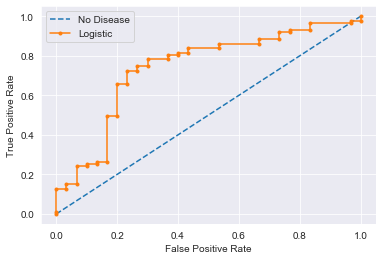

In [13]:
lr_probs = model_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

nd_probs = [0 for _ in range(len(y_test))]

nd_auc = roc_auc_score(y_test, nd_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (nd_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

nd_fpr, nd_tpr, _ = roc_curve(y_test, nd_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(nd_fpr, nd_tpr, linestyle='--', label='No Disease')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#### random forest classifier

In [14]:
rfc = RandomForestClassifier(n_estimators=40)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.7521367521367521
Precision: 0.8295454545454546
Recall: 0.8390804597701149
F-1 score: 0.8342857142857142


In [15]:
sqrt(3)

1.7320508075688772

In [16]:
rfc_ = RandomForestClassifier()
hyperparameters = {'n_estimators': [100, 200, 300, 1000],
                   'max_depth': [80, 90, 100, 110],
                   'min_samples_split': [2,10,20,40,80,100],
                   'min_samples_leaf': [2,10,20,40,80,100],
                   'max_features': [2, 3]}

gsrfc = GridSearchCV(rfc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gsrfc = gsrfc.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3269 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4889 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  7.1min finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to Fa

In [17]:
best_gsrfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.7692307692307693
Precision: 0.7678571428571429
Recall: 0.9885057471264368
F-1 score: 0.864321608040201


In [45]:
cross_val_score(rfc, x, y, cv=10).mean()

0.7067606919109579

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.805


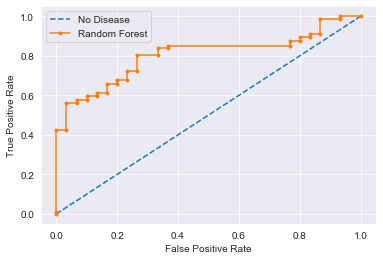

In [46]:
rfc_probs = rfc.predict_proba(X_test)
rfc_probs = rfc_probs[:, 1]

nd_probs = [0 for _ in range(len(y_test))]

nd_auc = roc_auc_score(y_test, nd_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)

print('No Skill: ROC AUC=%.3f' % (nd_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))

nd_fpr, nd_tpr, _ = roc_curve(y_test, nd_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

plt.plot(nd_fpr, nd_tpr, linestyle='--', label='No Disease')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#### KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.6837606837606838
Precision: 0.7840909090909091
Recall: 0.7931034482758621
F-1 score: 0.7885714285714285


The optimal number of neighbors is 11


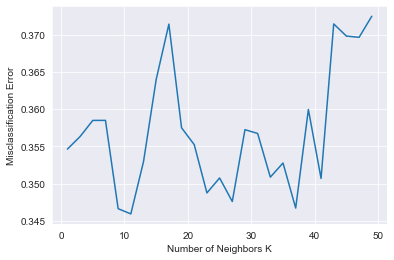

In [22]:
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn_t = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_t, X_train, y_train, cv=10, scoring='f1_weighted')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]

optimal_k = neighbors[mse.index(min(mse))]
print('The optimal number of neighbors is {}'.format(optimal_k))

plt.plot(neighbors, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.7094017094017094
Precision: 0.7731958762886598
Recall: 0.8620689655172413
F-1 score: 0.8152173913043478


In [24]:
cross_val_score(KNeighborsClassifier(n_neighbors=11), x, y, cv=10, scoring='accuracy').mean()

0.6874937196878813

No Disease: ROC AUC=0.500
KNN: ROC AUC=0.687


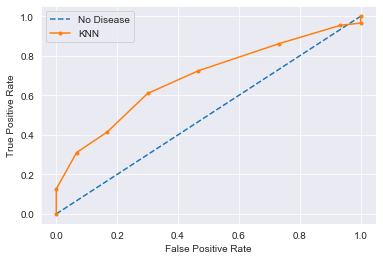

In [25]:
knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]

nd_probs = [0 for _ in range(len(y_test))]

nd_auc = roc_auc_score(y_test, nd_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

print('No Disease: ROC AUC=%.3f' % (nd_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))

nd_fpr, nd_tpr, _ = roc_curve(y_test, nd_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

plt.plot(nd_fpr, nd_tpr, linestyle='--', label='No Disease')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#### SVC

In [26]:
svm = SVC(gamma='auto', probability=True)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.7435897435897436
Precision: 0.7435897435897436
Recall: 1.0
F-1 score: 0.8529411764705882


In [27]:
cross_val_score(svm, x, y, cv=10).mean()

0.7135977729244208

In [28]:
svc_ = SVC()

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10],
                   'gamma' : [0.001, 0.01, 0.1, 1]}

gssvc = GridSearchCV(svc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gssvc = gssvc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
best_gssvc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
svm = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.7264957264957265
Precision: 0.7619047619047619
Recall: 0.9195402298850575
F-1 score: 0.8333333333333334


In [31]:
cross_val_score(svm, x, y, cv=10).mean()

0.7170773221774482

No Disease: ROC AUC=0.500
SVC: ROC AUC=0.616


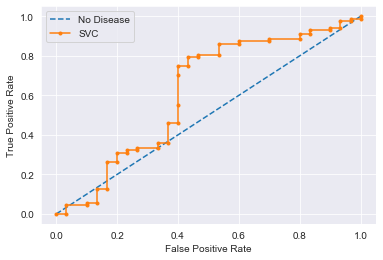

In [32]:
svc_probs = svm.predict_proba(X_test)
svc_probs = svc_probs[:, 1]

nd_probs = [0 for _ in range(len(y_test))]

nd_auc = roc_auc_score(y_test, nd_probs)
svc_auc = roc_auc_score(y_test, svc_probs)

print('No Disease: ROC AUC=%.3f' % (nd_auc))
print('SVC: ROC AUC=%.3f' % (svc_auc))

nd_fpr, nd_tpr, _ = roc_curve(y_test, nd_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)

plt.plot(nd_fpr, nd_tpr, linestyle='--', label='No Disease')
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#### comparing model (after hyperparam tuning)

In [33]:
a = [['logistic regression',model_lr.score(X_test, y_test),precision_score(y_test, model_lr.predict(X_test)), recall_score(y_test, model_lr.predict(X_test)),f1_score(y_test, model_lr.predict(X_test)), cross_val_score(model_lr, x, y, cv=10).mean()],
     ['rfc', rfc.score(X_test, y_test),precision_score(y_test, rfc.predict(X_test)),recall_score(y_test, rfc.predict(X_test)),f1_score(y_test, rfc.predict(X_test)), cross_val_score(rfc, x, y, cv=10).mean()],
     ['knn', knn.score(X_test, y_test), precision_score(y_test, knn.predict(X_test)),recall_score(y_test, knn.predict(X_test)), f1_score(y_test, knn.predict(X_test)), cross_val_score(knn, x, y, cv=10).mean()],
     ['svc', svm.score(X_test, y_test), precision_score(y_test, svm.predict(X_test)),recall_score(y_test, svm.predict(X_test)), f1_score(y_test, svm.predict(X_test)), cross_val_score(svm, x, y, cv=10).mean()]
     ]

dfcompare = pd.DataFrame(a, columns=['model', 'Accuracy','Precision','Recall','F-1 score','Cross Val Score'])
dfcompare


,model,Accuracy,Precision,Recall,F-1 score,Cross Val Score
0,logistic regression,0.743590,0.743590,1.000000,0.852941,0.713598
1,rfc,0.735043,0.791667,0.873563,0.830601,0.727186
2,knn,0.709402,0.773196,0.862069,0.815217,0.687494
3,svc,0.726496,0.761905,0.919540,0.833333,0.717077


In [34]:
y.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

Dari pengujian tersebut dan feature 'dataset' (disease or not) yang tidak seimbang (imbalance) saya memutuskan untuk memilih menggunakan random forest, karena nilai f-1 score-nya paling tinggi dan roc auc score-nya tinggi, serta bentuk plot roc auc score-nya paling baik (cenderung di atas 0.5 / true positif) di antara model lainnya.

In [47]:
import pickle

pickle.dump(rfc, open('model_ilp', 'wb'))

In [48]:
loadModel = pickle.load(open('model_ilp', 'rb'))

In [49]:
loadModel

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)